In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import VotingRegressor

In [2]:
df = pd.read_csv("D:\school sht\itd105\105webapp\ml model\insurance.csv")
dataframe = pd.DataFrame(df)
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
dataframe.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
dataframe.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
dataframe["sex"].replace({"male": 0, "female": 1}, inplace = True)
dataframe["smoker"].replace({"yes": 1, "no": 0}, inplace = True)
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [6]:
dataframe.pop('region')
dataframe.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


In [7]:
X = dataframe.drop('charges', axis = 1)
y = dataframe['charges']


In [8]:
models = []

lr = LinearRegression()
models.append(('LR', lr))

svm = SVR()
models.append(('SVM', svm))

ann = MLPRegressor()
models.append(('MLP', ann))

In [9]:
estimators = []

model0 = LinearRegression()
estimators.append(('lr', model0))

model2 = SVR()
estimators.append(('svm', model2))

model3 = MLPRegressor()
estimators.append(('ann', model3))

vot = VotingRegressor(estimators)
models.append(('VOT', vot))

In [10]:
from sklearn.ensemble import BaggingRegressor

baglr = BaggingRegressor(base_estimator = LinearRegression(), n_estimators=10)
models.append(('BAGLR', baglr))

bagsvm = BaggingRegressor(base_estimator = SVR(), n_estimators=10)
models.append(('BAGSVM', bagsvm))

bagann = BaggingRegressor(base_estimator = MLPRegressor(), n_estimators=10)
models.append(('BAGMLP', bagann))

In [11]:
from sklearn.ensemble import AdaBoostRegressor

adalr = AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=10)
models.append(('ADALR', adalr))

adasvm = AdaBoostRegressor(base_estimator=SVR(), n_estimators=10)
models.append(('ADASVM', adasvm))

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
names = []
msgs = []
scoring = 'neg_mean_squared_error'

for name, model in models:
  kfold = KFold(n_splits=10)
  cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s:\t %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msgs.append(msg)

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochasti

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochasti

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\en

In [13]:
for msg in msgs:
    print(msg)

LR:	 -37044419.407231 (5649232.839859)
SVM:	 -161633182.938609 (22157833.393740)
MLP:	 -136019403.052678 (18069891.279552)
VOT:	 -86296241.861845 (12638136.529571)
BAGLR:	 -37064460.573839 (5524867.521296)
BAGSVM:	 -161514154.070113 (22330802.393075)
BAGMLP:	 -137117018.649193 (18059523.545577)
ADALR:	 -39620857.672941 (5497152.454874)
ADASVM:	 -149601341.976004 (19873471.167679)


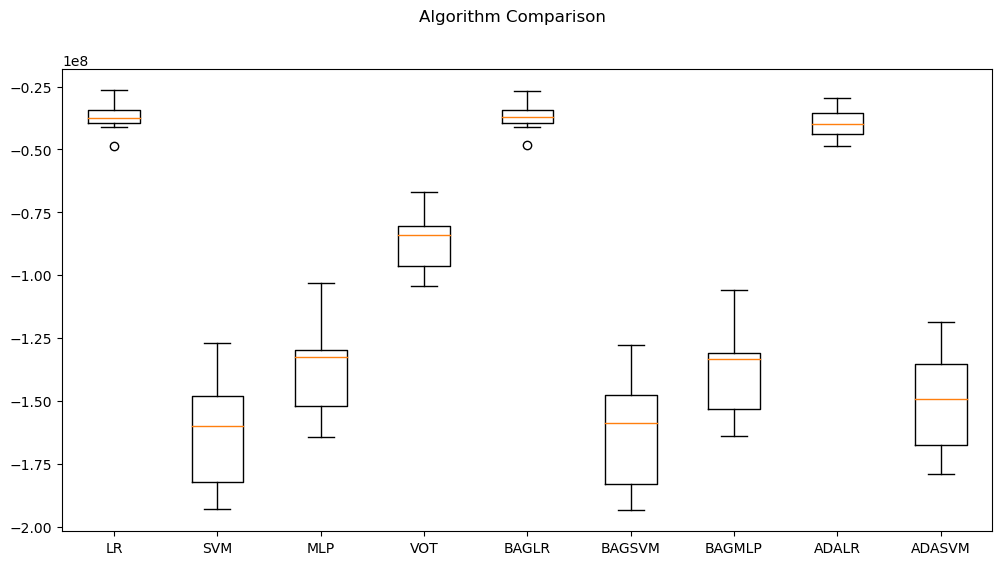

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

result = lr_model.score(X_test, y_test)
print(("Accuracy : %.3f%%") % (result * 100.0))

Accuracy : 78.113%


In [15]:
def model_report(y_test, y_pred):
    print(f"Accuracy: {lr_model.score(X_test, y_test) * 100:.2f}%")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"R2: {r2_score(y_test, y_pred)}")
    
y_pred = lr_model.predict(X_test)

model_report(y_test, y_pred)

Accuracy: 78.11%
MAE: 4213.484797807139
MSE: 33979257.05080822
R2: 0.7811302113434095


In [16]:
import joblib

filename = 'D:\\school sht\\itd105\\105webapp\\ml model\\regression_model.aiml'
joblib.dump(lr_model, filename)

['D:\\school sht\\itd105\\105webapp\\ml model\\regression_model.aiml']